In [15]:
#importing libraries 
import pandas as pd
import numpy as np

# import sklearn libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from  sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/Customertravel.csv')

In [6]:
df.head(2)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1


In [8]:
X = df.drop(columns=['Target'],axis=1)
y = df['Target']

In [9]:
X.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot
0,34,No,Middle Income,6,No,Yes
1,34,Yes,Low Income,5,Yes,No
2,37,No,Middle Income,3,Yes,No
3,30,No,Middle Income,2,No,No
4,30,No,Low Income,1,No,No


In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(954, 12)

In [14]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((763, 12), (191, 12))

In [22]:
def evaluate_model(true, predicted):
    return precision_recall_fscore_support(true,predicted,average='binary')
    

In [23]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    
}
model_list = []
f1 =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    train_precision , train_recall , train_f1_score ,_= evaluate_model(y_train, y_train_pred)

    test_precision , test_recall , test_f1_score,_ = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Precision: {:.4f}".format(train_precision))
    print("- Recall: {:.4f}".format(train_recall))
    print("- f1_score: {:.4f}".format(train_f1_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Precision: {:.4f}".format(test_precision))
    print("- Recall: {:.4f}".format(test_recall))
    print("- f1_score: {:.4f}".format(test_f1_score))
    f1.append(test_f1_score)
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Precision: 0.6544
- Recall: 0.4785
- f1_score: 0.5528
----------------------------------
Model performance for Test set
- Precision: 0.6667
- Recall: 0.5789
- f1_score: 0.6197


Decision Tree
Model performance for Training set
- Precision: 0.9563
- Recall: 0.8226
- f1_score: 0.8844
----------------------------------
Model performance for Test set
- Precision: 0.8065
- Recall: 0.6579
- f1_score: 0.7246


Random Forest Classifier
Model performance for Training set
- Precision: 0.8967
- Recall: 0.8871
- f1_score: 0.8919
----------------------------------
Model performance for Test set
- Precision: 0.6667
- Recall: 0.5789
- f1_score: 0.6197




In [24]:
pd.DataFrame(list(zip(model_list, f1)), columns=['Model Name', 'f1_score'])

,Model Name,f1_score
0,Logistic Regression,0.619718
1,Decision Tree,0.724638
2,Random Forest Classifier,0.619718


##### Decision Tree

In [28]:
dec_model = DecisionTreeClassifier()
dec_model = dec_model.fit(X_train, y_train)
y_pred = dec_model.predict(X_test)
_,_,f1_score,_ = precision_recall_fscore_support(y_test, y_pred,average='binary')
print(" Accuracy of the model is %.2f" %(f1_score*100))

 Accuracy of the model is 72.46


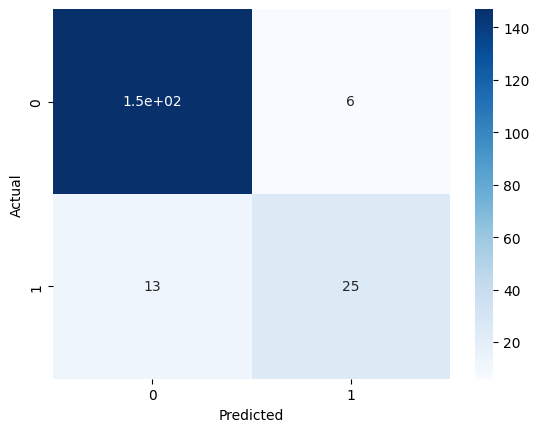

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
# incorrect predictions 
df.iloc[pred_df[pred_df['Actual Value']!=pred_df['Predicted Value']].index]

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
703,29,No,Low Income,5,Yes,No,1
76,31,No,Low Income,4,Yes,No,0
621,30,Yes,High Income,1,No,No,1
381,31,Yes,High Income,1,No,No,1
333,34,Yes,High Income,1,No,No,1
633,30,Yes,High Income,1,No,No,1
839,28,No,Middle Income,4,No,No,1
235,33,No,Low Income,5,Yes,Yes,1
513,29,Yes,High Income,1,No,No,1
664,37,No,Low Income,5,No,Yes,1
